# Terremotos e atividades vulcânicas

In [5]:
# Uploading files from your local file system

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving countryMap.txt to countryMap (1).txt
Saving plotly_countries_and_codes.csv to plotly_countries_and_codes (3).csv
Saving terremotos2.csv to terremotos2 (2).csv
Saving volcano_data_2010.csv to volcano_data_2010 (4).csv
User uploaded file "countryMap.txt" with length 4922 bytes
User uploaded file "plotly_countries_and_codes.csv" with length 4736 bytes
User uploaded file "terremotos2.csv" with length 2397103 bytes
User uploaded file "volcano_data_2010.csv" with length 7998 bytes


O Dataset [terremotos.csv](https://www.kaggle.com/usgs/earthquake-database) utilizado neste notebook contem informações sobre terremotos que chamaram atenção globalmente no período de 1965 até 2016. Ele possui 21 colunas e 23412 linhas.

### Descrição das colunas 

| Coluna | Tipo | Formato |
|----------------------------|---------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Date | Date | mm/dd/aaaa |
| Time | Date | hh:mm:ss |
| Latitude | Numeric |  |
| Longitude | Numeric |  |
| Type | String | 'Earthquake', 'Nuclear Explosion', 'Explosion', 'Rock Burst' |
| Depth | Numeric |  |
| Depth Error | String |  |
| Depth Seismic Stations | String |  |
| Magnitude | Numeric |  |
| Magnitude Type | String | 'MW', 'ML', 'MH', 'MS', 'MB', 'MWC', 'MD', nan, 'MWB', 'MWW', 'MWR' |
| Magnitude Error | String |  |
| Magnitude Seismic Stations | String |  |
| Azimuthal Gap | String |  |
| Horizontal Distance | String |  |
| Horizontal Error | String |  |
| Root Mean Square | String |  |
| ID | String |  |
| Source | String |  |
| Location Source | String |  |
| Magnitude Source | String |  |
| Status | String | 'Automatic', 'Reviewed' |

#### Valores da coluna _Magnitude Type_ 
- ML: Local (Richter) magnitude;
- MS: surface wave magnitude scale; 
- MB (Mb): Body wave magnitude scale;
- MW (Mw): Moment magnitude scale; 
- MD (Md): Duration magnitude/signal duration;
- MD (Md): Duration magnitude/signal duration;

In [0]:
#Importando o que será utilizado

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
terremotos = pd.read_csv("terremotos2.csv", encoding='latin-1')
terremotos.head()

Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3  01/08/1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4  01/09/1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type    ...      \
0                     NaN        6.0             MW    ...       
1                     NaN        5.8             MW    ...       
2                     NaN        6.2             MW    ...       
3                     NaN        5.8             MW    ...       
4                     NaN        5.8             MW    ...       

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                         NaN            NaN                  NaN   
1                         NaN            NaN                  NaN   
2                         NaN            NaN                  NaN   
3                         NaN            NaN                  NaN   
4                         NaN            NaN                  NaN   

   Horizontal Error  Root Mean Square            ID  Source Location Source  \
0               NaN               NaN  ISCGEM860706  ISCGEM          ISCGEM   
1               NaN               NaN  ISCGEM860737  ISCGEM          ISCGEM   
2               NaN               NaN  ISCGEM860762  ISCGEM          ISCGEM   
3               NaN               NaN  ISCGEM860856  ISCGEM          ISCGEM   
4               NaN               NaN  ISCGEM860890  ISCGEM          ISCGEM   

  Magnitude Source     Status  
0           ISCGEM  Automatic  
1           ISCGEM  Automatic  
2           ISCGEM  Automatic  
3           ISCGEM  Automatic  
4           ISCGEM  Automatic  

[5 rows x 21 columns]

# Tratando os dados 

(LARISSA)

Para garantir a coesão dos dados e permitir que possamos utilizá-los em nossas análises, realizamos as seguintes alterações:

- Ajuste nos nomes das colunas para caracteres minúsculos;
- Ajuste nos nomes das colunas alterando-os para o formato "*snake_case*";
- Ajuste da coluna "*date*", para que possamos utilizar os dados das datas dos terremotos;
- Ajuste da coluna "*time*", para que possamos utilizar os dados dos horários dos terremotos.


Durante a limpeza do Dataframe, encontramos nas linhas "3378", "7512" e "20650" dados mal formatados. Portanto, para deixá-los em conformidade com o restante das informações realizamos as alterações diretamente nas linhas com má formatação. 



In [0]:
from datetime import datetime
import time

#Alterando o nome das colunas
terremotos.columns = terremotos.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

#Datas
terremotos['date'] = pd.to_datetime(terremotos['date'], infer_datetime_format=True)


#Tempo
terremotos['time'][3378] = "02:58:41"  #Essa linha possue erro na formatação, portanto foi consertada
terremotos['time'][7512] = "02:53:41"  #Essa linha possue erro na formatação, portanto foi consertada
terremotos['time'][20650] = "02:23:34" #Essa linha possue erro na formatação, portanto foi consertada
terremotos['time'] = pd.to_datetime(terremotos['time'], infer_datetime_format=False ,format='%H:%M:%S').dt.time

# Mapa de calor e de pontos

(MICHEL)

O mapa de calor demonstra toda a região do hemisfério em que há abalos sísmicos, enquanto um mapa de clusters centraliza seus locais de ocorrência.

Nota-se que há uma maior intensidade de ocasionamentos na Oceania, no Sul da Ásia e na costa Oeste da América do Sul. 

Percebe-se, também, que existe um "caminho" dentre os terremotos demarcados, mais especificamente, derivada da movimentação das placas tectônicas, que em vezes causam terremotos ao se chocarem umas com as outras.

In [0]:
#Por algum motivo, o Chrome não consegue renderizar mapas complexos
#Porém, o Firefox consegue renderizar o mapa abaixo sem problemas

import folium
from folium.plugins import HeatMap
from folium import plugins

mapa = folium.Map(
  location = (7.18805555556, 21.0936111111),
  zoom_start = 2.4,
  tiles = 'Stamen Terrain',
  width = '100%',
  height = '100%'
)

lat_long = list(zip(terremotos["latitude"], terremotos["longitude"]))

HeatMap(
  lat_long, 
  radius = 10, 
  min_opacity = 0.5, 
  max_val = 0.1, 
  blur = 15, 
  name = "Heat", 
  gradient = {0.25: 'green', 0.5: 'yellow', 0.75: 'orange', 1.0: 'red'}
).add_to(mapa)

plugins.MarkerCluster(
  lat_long, 
  name = "Cluster"
).add_to(mapa)

mapa.add_child(folium.LayerControl())

mapa

# Analises com Histogramas


(JONAS)

Os terremotos ocorrem com mais frequência em novembro, dezembro e janeiro.
Apesar da ocorrência de  terremotos não poder ser prevista, já que não há um padrão específico que caracterize o evento,  é possível apontar as falhas geológicas onde a energia vem se **acumulando ao longo do tempo** entre duas ou mais placas tectônicas, o que faz a ocorrência de um terremoto ser mais propensa a acontecer a qualquer momento.


Analisando o segundo grafico é possivel perceber que a quantidade de terrmotos esta aumentando cada vezes mais ao longo dos anos. Um possivel motivo para isso é o aquecimento global da terra. 
Logo, as vibrações que ocorrem nos terremotos vão **desecandeando** outros terremotos, como um efeito dominó.
Outro motivo seria consequência de melhores instrumentos de medição de terremotos e melhores relatórios desses grandes terremotos.
Em 1931, havia cerca de 350 estações sismológicas e, hoje, existem mais de 4.000 estações.


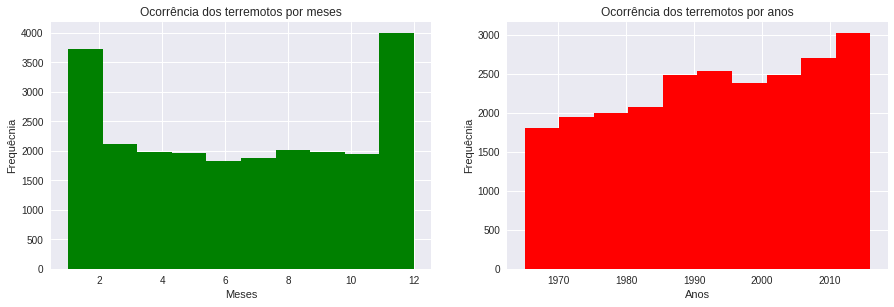

In [81]:
anos_terremotos = pd.Series([i.year for i in terremotos["date"]])
meses_terremotos = pd.Series([i.month for i in terremotos["date"]])

plt.rcParams['figure.figsize'] = (15,10) #padronizando tamanho das imagens

plt.subplot(2, 2, 1)
meses_terremotos.hist(color="green")
plt.title('Ocorrência dos terremotos por meses')
plt.xlabel('Meses')
plt.ylabel('Frequêcnia')

plt.subplot(2, 2, 2)
anos_terremotos.hist(color="red")
plt.title('Ocorrência dos terremotos por anos')
plt.xlabel('Anos')
plt.ylabel('Frequêcnia')

plt.show()

**Intensidade**: É a gravidade da agitação do terremoto.

**Magnitude**: O tamanho do terremoto é uma medida quantitativa do tamanho do terremoto em sua origem. A escala de magnitude Richter mede a quantidade de energia sísmica liberada por um terremoto.

Quando um terremoto ocorre, sua magnitude pode receber um único valor numérico na escala de magnitude Richter . No entanto, a intensidade é variável sobre a área afetada pelo terremoto, com altas intensidades perto do epicentro e valores mais baixos mais distantes. Estes são atribuídos um valor dependendo dos efeitos da agitação de acordo com a Escala de Intensidade de Mercalli Modificada .


Para entender melhor a escala Ritcher devemos conhecer a gravidade de cada valor na escala:

- Inferiores a 3.5 graus: raramente são notados.

- De 3,5 a 5,4 graus: geralmente sentido, mas raramente causa danos.

- Entre 5,5 a 6 graus: provocam pequenos danos em edifícios bem estruturados, no entanto, seus efeitos são arrasadores em edifícios de estrutura precária.

- De 6,1 a 6,9 graus: causa destruição em áreas de até 100 quilômetros de raio.

- De 8 a 8,5 graus: é considerado um abalo fortíssimo, causando destruição da infraestrutura.

- De 9 graus: destruição total.

Analisando o primeiro gráfico é possível perceber que a maioria dos terermotos variam entre 5.0  e 6.0 na escala Ritcher. Ou seja, a maioria dos terremotos registrados podem ter causado muitos danos a edificios com a estrutura ruim.



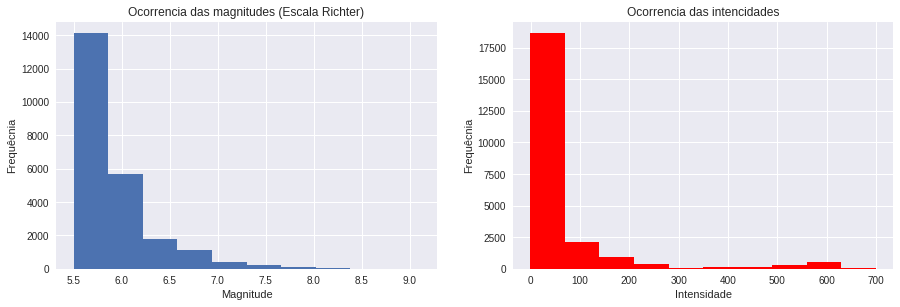

In [82]:
plt.subplot(2, 2, 1)
terremotos["magnitude"].plot.hist()
plt.title('Ocorrencia das magnitudes (Escala Richter)')
plt.xlabel('Magnitude')
plt.ylabel('Frequêcnia')

plt.subplot(2, 2, 2)
terremotos["depth"].plot.hist(color="red")
plt.title('Ocorrencia das intensidades')
plt.xlabel('Intensidade')
plt.ylabel('Frequêcnia')

plt.show()

# Top 5 das regiões que mais acontecem terremotos 

(LARISSA)

Para melhorar a visualização utilizamos o "*Folium*", que permitiu conferirmos as 5(cinco) regiões com maior ocorrência de terremotos de 1965 à 2016. 

Para isto, seguimos os seguintes passos:
  - Utilizamos uma biblioteca Python chamada "[Reverse Geocoder](https://github.com/thampiman/reverse-geocoder)" para transformar os dados de "latitude" e "longitude" em regiões, facilitando assim a exibição das informações;
  - Selecionamos as 5 regiões com maior ocorrência de tremores de terra;
  - Após o último passo, selecionamos a latitude e a longitude destes países e marcamos no mapa, para assim visualizarmos as regiões que com maior frequência sofrem terremotos.



In [14]:
#Instalando o pacote reverse geocoder
!pip install reverse_geocoder

In [87]:
import reverse_geocoder as rg

#Criando coluna com as coordenadas
coordinate = []
for lat, long in zip(terremotos['latitude'], terremotos['longitude']):
  lat_long = (lat, long)
  coordinate.append(lat_long)

terremotos["coordinate"] = coordinate
result_paises = rg.search(coordinate)

#Criando coluna com os locais
locais = [dict['name'] for dict in result_paises]
terremotos["locais"] = locais

terremotos["locais"].head()

0          Saipan
1    Tongutisungi
2          Pangai
3       Grytviken
4          Dapdap
Name: locais, dtype: object

In [0]:
#Instalando o pacote Folium
!pip install folium

In [68]:
from collections import Counter

#Contagem de regiões com maior ocorrência
cinco_locais= terremotos["locais"]
locais_counts = [ [key, value] for key, value in Counter(cinco_locais).items()]
locais_counts.sort(key=lambda x: x[1], reverse=True)
print(locais_counts)

#As 5 regiões com maior ocorrência de tremores
locais_terremotos = [i[0] for i in locais_counts[0:5]]
print(locais_terremotos)

[['`Ohonua', 890], ['Grytviken', 532], ['Hihifo', 436], ['Haveluloto', 406], ["Kuril'sk", 364], ['Kokopo', 334], ['Isangel', 325], ['Lata', 308], ['Dutch Harbor', 302], ['Panguna', 267], ["Severo-Kuril'sk", 242], ['Alo', 238], ['Sola', 233], ['Hanga Roa', 226], ['Saipan', 200], ['Adamstown', 199], ['Shikotan', 192], ['Kirakira', 184], ['Buka', 182], ['Waitangi', 180], ['Tadine', 171], ['Port-Vila', 158], ['Beringovskiy', 150], ['Unalaska', 145], ['Pangai', 144], ['Lospalos', 143], ['Neiafu', 143], ['Edinburgh of the Seven Seas', 140], ['Ostrov Paskhi', 137], ['Kimbe', 134], ['Georgetown', 129], ['Miyako', 127], ['Shimoda', 124], ['Tongutisungi', 117], ['Port-Olry', 115], ["Ust'-Kamchatsk Staryy", 114], ['Finschhafen', 111], ['Gizo', 106], ['Katsuura', 106], ['Geser', 103], ['Riverton', 103], ['Petropavlovsk-Kamchatsky', 103], ['Kandrian', 97], ['Punta de Burica', 95], ['Puerto Villamil', 94], ['Tilichiki', 93], ['Fernando de Noronha (Distrito Estadual)', 93], ['Suva', 92], ['Geeveston'

In [0]:
#Pega os dados de cada país para exibir no gráfico
local1 = terremotos.loc[terremotos["locais"] == locais_terremotos[0]].head()
local2 = terremotos.loc[terremotos["locais"] == locais_terremotos[1]].head()
local3 = terremotos.loc[terremotos["locais"] == locais_terremotos[2]].head()
local4 = terremotos.loc[terremotos["locais"] == locais_terremotos[3]].head()
local5 = terremotos.loc[terremotos["locais"] == locais_terremotos[4]].head()


In [83]:
#Gerando os graficos
import folium

m = folium.Map(
    zoom_start=1,
    tiles='Stamen Terrain',
    width='100%',
    height='100%'
)
folium.Marker([local1["latitude"][74], local1["longitude"][74]], popup='<i>1º maior ocorrência</i>').add_to(m)
folium.Marker([local2["latitude"][3], local2["longitude"][3]], popup='<b>2º maior ocorrência</b>').add_to(m)
folium.Marker([local3["latitude"][61], local3["longitude"][61]], popup='<b>3º maior ocorrência</b>').add_to(m)
folium.Marker([local4["latitude"][154], local4["longitude"][154]], popup='<b>4º maior ocorrência</b>').add_to(m)
folium.Marker([local5["latitude"][110], local5["longitude"][110]], popup='<b>5º maior ocorrência</b>').add_to(m)
m

- Após a visualização do mapa, podemos perceber que todas as cinco regiões são ilhas;
- Percebemos que três das regiões mais afetadas, ficam nas ilhas do Pacífico;
- A formação destas ilhas se deu por influência da atividade sísmica. 

# Atividade vulcânica

(NATÁLIA)

Poderia o movimento das placas tectônicas influenciar na erupção de vulcões? Outro [dataset](https://www.kaggle.com/texasdave/volcano-eruptions) com informações sobre atividade vulcânicas ao redor do mundo de 2010 até 2016 foi modificado para analisar que países tiveram maior.





In [10]:
import plotly as py
import plotly.graph_objs as go

import numpy as np
import pandas as pd

# call everytime a new offline plot has to be done with plotly.
# from: https://stackoverflow.com/a/47230966
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

# original volcano dataset
volcanos = pd.read_csv("volcano_data_2010.csv", encoding='latin-1')
volcanos.head()

Year  Month   Day  TSU   EQ                    Name              Location  \
0  2010      1   NaN  NaN  NaN              Tungurahua               Ecuador   
1  2010      3  31.0  NaN  NaN        Eyjafjallajokull             Iceland-S   
2  2010      5  27.0  NaN  NaN                  Pacaya             Guatemala   
3  2010      5  29.0  TSU   EQ                 Sarigan  Mariana Is-C Pacific   
4  2010      8   6.0  NaN  NaN  Karangetang [Api Siau]  Sangihe Is-Indonesia   

         Country  Latitude  Longitude                 ...                  \
0        Ecuador    -1.467    -78.442                 ...                   
1        Iceland    63.630    -19.620                 ...                   
2      Guatemala    14.381    -90.601                 ...                   
3  United States    16.708    145.780                 ...                   
4      Indonesia     2.780    125.480                 ...                   

   TOTAL_DEATHS TOTAL_DEATHS_DESCRIPTION TOTAL_MISSING  \
0           NaN                      NaN           NaN   
1           2.0                      1.0           NaN   
2           1.0                      1.0           3.0   
3           NaN                      NaN           NaN   
4           4.0                      1.0           NaN   

  TOTAL_MISSING_DESCRIPTION  TOTAL_INJURIES TOTAL_INJURIES_DESCRIPTION  \
0                       NaN             NaN                        NaN   
1                       NaN             NaN                        NaN   
2                       1.0             NaN                        NaN   
3                       NaN             NaN                        NaN   
4                       NaN             5.0                        1.0   

   TOTAL_DAMAGE_MILLIONS_DOLLARS  TOTAL_DAMAGE_DESCRIPTION  \
0                            NaN                       1.0   
1                            NaN                       NaN   
2                            NaN                       1.0   
3                            NaN                       NaN   
4                            NaN                       NaN   

   TOTAL_HOUSES_DESTROYED  TOTAL_HOUSES_DESTROYED_DESCRIPTION  
0                     NaN                                 NaN  
1                     NaN                                 NaN  
2                     3.0                                 1.0  
3                     NaN                                 NaN  
4                     NaN                                 1.0  

[5 rows x 36 columns]

In [0]:
# create dataframe "df_country" from series (all countries from "volcanos")
df_country = volcanos['Country'].value_counts().to_frame()
# number of unique entries/countries
entries = df_country.shape[0]
# turn previous index into column "code"
df_country["code"] = df_country.axes[0]
# set new numeric index and assign resulting dataframe to "volc_activity"
volc_activity = df_country.set_axis([i for i in range(entries)],
                     axis='index',
                     inplace=False)
# renaming columns
volc_activity = volc_activity.rename(index=str,
                               columns={"Country": "VOLCANIC_ACTIVITY",
                                        "code": "COUNTRY"})

# dataframe with country codes for ploty
plotly_3let_code = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv")
# merging datasets
volc_activity = volc_activity.merge(plotly_3let_code)

volc_activity.head()

VOLCANIC_ACTIVITY        COUNTRY  GDP (BILLIONS) CODE
0                 26      Indonesia           856.1  IDN
1                  7  United States         17420.0  USA
2                  5          Japan          4770.0  JPN
3                  3    Philippines           284.6  PHL
4                  3        Ecuador           100.5  ECU

### Choropleth dos vulcões

In [3]:
# preparing to plot choropleth with plotly

df = volc_activity

data = [ dict(
        type = 'choropleth',
        locations = df['CODE'],
        z = df['VOLCANIC_ACTIVITY'],
        text = df['COUNTRY'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Vulcan<br>Activity'),
      ) ]

layout = dict(
    title = 'Vulcan Activity from 2010 to 2016<br>Source:\
            <a href="https://www.kaggle.com/texasdave/volcano-eruptions">\
            Kaggle</a>',
    geo = dict(
        showframe = True,
        showcoastlines = True,
        showcountries = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )

# offline plotting
py.offline.init_notebook_mode(connected=True)
configure_plotly_browser_state()
py.offline.iplot( fig, validate=False, filename='d3-world-map' )

Por outro lado, utilizando o dataset de terremotos, conseguimos um choropleth durante o mesmo periodo.

In [11]:
#Removendo terremotos de antes de 2010

tm2010_2016 = terremotos[terremotos["date"] >= pd.Timestamp('2010-01-1 00:00:00')]
tm2010_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3574 entries, 19838 to 23411
Data columns (total 21 columns):
date                          3574 non-null datetime64[ns]
time                          3574 non-null object
latitude                      3574 non-null float64
longitude                     3574 non-null float64
type                          3574 non-null object
depth                         3574 non-null float64
depth_error                   2137 non-null float64
depth_seismic_stations        2008 non-null float64
magnitude                     3574 non-null float64
magnitude_type                3574 non-null object
magnitude_error               301 non-null float64
magnitude_seismic_stations    500 non-null float64
azimuthal_gap                 3533 non-null float64
horizontal_distance           1537 non-null float64
horizontal_error              1077 non-null float64
root_mean_square              3492 non-null float64
id                            3574 non-null object
sou

In [15]:
# Trabalhando com o reverse_geocoder:

import reverse_geocoder as rg

#Criando coluna com as coordenadas
coordinate = []
for lat, long in zip(tm2010_2016['latitude'], tm2010_2016['longitude']):
  lat_long = (lat, long)
  coordinate.append(lat_long)

tm2010_2016["coordinate"] = coordinate
result_paises = rg.search(coordinate)

#Criando coluna com os country codes
country_code_2let = [dict['cc'] for dict in result_paises]
tm2010_2016["country_code_2let"] = country_code_2let

tm2010_2016["country_code_2let"].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Loading formatted geocoded file...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



19838    GU
19839    PG
19840    PE
19841    SB
19842    SB
Name: country_code_2let, dtype: object

In [16]:
# changing country code from 2-letter to 3-letter format
# from: https://github.com/gsnaveen/plotly-worldmap-mapping-2letter-CountryCode-to-3letter-country-code
dfcountry = pd.read_csv('countryMap.txt',sep='\t')
tm2010_2016 = tm2010_2016.merge(dfcountry,how='inner',left_on=['country_code_2let'],right_on=['2let'])
tm2010_2016.head()

date      time  latitude  longitude        type  depth  depth_error  \
0 2010-01-02  08:45:33    12.424    141.949  Earthquake    8.0          NaN   
1 2010-07-10  05:39:43    14.006    145.026  Earthquake  136.0          NaN   
2 2010-07-10  11:43:33    11.143    145.999  Earthquake   13.0          NaN   
3 2010-08-23  01:08:09    12.805    143.558  Earthquake  116.0          NaN   
4 2011-05-13  01:04:37    12.434    143.987  Earthquake    5.8         13.1   

   depth_seismic_stations  magnitude magnitude_type ...           id  source  \
0                   234.0        6.1            MWB ...   USP000H5M6      US   
1                   271.0        5.6            MWC ...   USP000HF3F      US   
2                   443.0        6.3            MWC ...   USP000HF3T      US   
3                   288.0        5.5            MWB ...   USP000HJMY      US   
4                   317.0        5.5            MWW ...   USP000J1GR      US   

   location_source  magnitude_source    status  \
0               US                US  Reviewed   
1               US              GCMT  Reviewed   
2               US                US  Reviewed   
3               US                US  Reviewed   
4               US                US  Reviewed   

                                 coordinate country_code_2let Countrylet 2let  \
0  (12.424000000000001, 141.94899999999998)                GU       Guam   GU   
1             (14.005999999999998, 145.026)                GU       Guam   GU   
2             (11.142999999999999, 145.999)                GU       Guam   GU   
3                         (12.805, 143.558)                GU       Guam   GU   
4             (12.434000000000001, 143.987)                GU       Guam   GU   

  3let  
0  GUM  
1  GUM  
2  GUM  
3  GUM  
4  GUM  

[5 rows x 26 columns]

In [17]:
# create a new dataframe from series
df_country = tm2010_2016['3let'].value_counts().to_frame()

# number of entries
entries = df_country.shape[0]

# turn previous index into column "code"
df_country["CODE"] = df_country.axes[0]

# set new numeric index
new_dfc = df_country.set_axis([i for i in range(entries)],
                     axis='index',
                     inplace=False)
tm_country_2010_2016 = new_dfc.rename(index=str,
                               columns={"3let": "QTD_TERREMOTOS"})
tm_country_2010_2016.head()

QTD_TERREMOTOS CODE
0             482  JPN
1             329  CHL
2             322  IDN
3             284  TON
4             225  PNG

### Choropleth dos terremotos

In [18]:
# offline plotting with plotly

df = tm_country_2010_2016

data = [ dict(
        type = 'choropleth',
        locations = df['CODE'],
        z = df['QTD_TERREMOTOS'],
        text = df['CODE'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = True,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = True,
            title = 'Earthquakes<br>(qty.)'),
      ) ]

layout = dict(
    title = 'Earthquakes from 2010 to 2016 <br>Source:\
            <a href="https://www.kaggle.com/usgs/earthquake-database">\
            Kaggle</a>',
    geo = dict(
        showframe = True,
        showcoastlines = True,
        showcountries=True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )

# Offline plotting
py.offline.init_notebook_mode(connected=True)
configure_plotly_browser_state()
py.offline.iplot( fig, validate=False, filename='d3-world-map' )

Segundo o [Observatório terrestre de Cingapura](https://www.earthobservatory.sg/faq-on-earth-sciences/are-earthquakes-and-volcanic-eruptions-related-0), a sobreposição do mapa de vulcões ativos no mundo sobre um mapa dos terremotos durante os ultimos 30 anos, dá pra ver que eles casam perfeitamente, justamente por serem localizados nas áreas de atrito entre placas tectônicas. Entretanto, estes dois fenômenos não estão diretamente relacionados.

# Fontes

- [Hype Science](https://hypescience.com/porque-ocorreram-tantos-grandes-terremotos-ultimamente/
https://brasilescola.uol.com.br/geografia/escala-richter.htm)
- [Reverse Geocoder](https://github.com/thampiman/reverse-geocoder)
- [Plotly](https://plot.ly/python/choropleth-maps/)